NBA ERA Explained (All Detail coming from a Reddit Post)
- 1956-1967: Russell Era
- 1968-1979: ABA Expansion
- 1980-1992: Magic and Bird Era
- 1993-2003: Jordan to 2003s
- 2004-2013: Modern Era
- 2014-Present: 3-Point Curry Era

Data Collecting

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [219]:
pd.set_option('display.max_columns', None)
df_awards = pd.read_csv('Dataset/Player Award Shares.csv')
df_awards = df_awards.drop(columns=['seas_id', 'player_id'])
df_awards

,season,award,player,age,tm,first,pts_won,pts_max,share,winner
0,2024,clutch_poy,Stephen Curry,35,GSW,45.0,298.0,495.0,0.602,True
1,2024,clutch_poy,DeMar DeRozan,34,CHI,34.0,272.0,495.0,0.549,False
2,2024,clutch_poy,Shai Gilgeous-Alexander,25,OKC,11.0,160.0,495.0,0.323,False
3,2024,clutch_poy,Nikola Jokić,28,DEN,4.0,85.0,495.0,0.172,False
4,2024,clutch_poy,Jalen Brunson,27,NYK,2.0,26.0,495.0,0.053,False
...,...,...,...,...,...,...,...,...,...,...
3371,1956,nba mvp,Mel Hutchins,27,FTW,9.0,9.0,80.0,0.113,False
3372,1956,nba mvp,Dolph Schayes,27,SYR,2.0,2.0,80.0,0.025,False
3373,1956,nba mvp,Bill Sharman,29,BOS,2.0,2.0,80.0,0.025,False
3374,1956,nba mvp,Tom Gola,23,PHW,1.0,1.0,80.0,0.013,False


In [220]:
df_awards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   season   3376 non-null   int64  
 1   award    3376 non-null   object 
 2   player   3376 non-null   object 
 3   age      3376 non-null   int64  
 4   tm       3376 non-null   object 
 5   first    3359 non-null   float64
 6   pts_won  3375 non-null   float64
 7   pts_max  3375 non-null   float64
 8   share    3375 non-null   float64
 9   winner   3375 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 263.9+ KB


In [221]:
df_team = pd.read_csv('Dataset/Team Summaries.csv', usecols=['season', 'abbreviation', 'w', 'l'])
df_team[['w', 'l']] = df_team[['w', 'l']].astype('Int64')
df_team.rename(columns={'abbreviation':'team'}, inplace=True)
df_team

,season,team,w,l
0,2025,ATL,36,38
1,2025,BOS,56,19
2,2025,BRK,25,51
3,2025,CHI,33,42
4,2025,CHO,19,56
...,...,...,...,...
1871,1947,PRO,28,32
1872,1947,STB,38,23
1873,1947,TRH,22,38
1874,1947,WSC,49,11


In [222]:
df_player_seasons = pd.read_csv('Dataset/Player Per Game.csv')
# Player_id keep in case same name players
df_player_seasons = df_player_seasons.drop(columns=['lg', 'birth_year', 'seas_id', 'player_id'])
df_player_seasons.rename(columns={
    'tm' : 'team',
    'mp_per_game' : 'MP',
    'fg_per_game' : 'FG',
    'fga_per_game' : 'FGA',
    'fg_percent' : 'FG%',
    'x3p_per_game' : '3P',
    'x3pa_per_game' : '3PA',
    'x3p_percent' : '3P%',
    'x2p_per_game' : '2P',
    'x2pa_per_game' : '2PA',
    'x2p_percent' : '2P%',
    'e_fg_percent' : 'eFG%',
    'ft_per_game' : 'FT',
    'fta_per_game' : 'FTA',
    'ft_percent' : 'FT%',
    'orb_per_game' : 'ORB',
    'drb_per_game' : 'DRB',
    'trb_per_game' : 'TRB',
    'ast_per_game' : 'AST',
    'stl_per_game' : 'STL',
    'blk_per_game' : 'BLK',
    'tov_per_game' : 'TOV',
    'pf_per_game' : 'PF',
    'pts_per_game' : 'PTS'
}, inplace=True)
df_player_seasons[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] = df_player_seasons[['FG%', '3P%', '2P%', 'eFG%', 'FT%']] * 100
df_player_seasons

,season,player,pos,age,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2025,A.J. Green,SG,25.0,3.0,MIL,66,6.0,22.7,2.5,5.9,42.3,2.1,5.0,41.4,0.4,0.8,47.3,60.1,0.3,0.4,83.3,0.2,2.0,2.3,1.5,0.5,0.1,0.6,2.2,7.4
1,2025,A.J. Lawson,SG,24.0,3.0,TOR,19,2.0,17.3,2.7,7.1,38.1,1.3,4.0,31.6,1.4,3.1,46.6,47.0,1.2,1.8,64.7,0.7,2.3,3.0,0.8,0.3,0.2,0.4,1.5,7.8
2,2025,AJ Johnson,SG,20.0,1.0,TOT,22,5.0,18.0,2.4,5.8,40.6,0.7,2.5,29.1,1.6,3.3,49.3,46.9,1.0,1.1,84.0,0.3,1.7,2.0,2.4,0.4,0.1,1.0,0.9,6.4
3,2025,AJ Johnson,SG,20.0,1.0,MIL,7,0.0,6.3,1.1,2.7,42.1,0.4,0.7,60.0,0.7,2.0,35.7,50.0,0.1,0.3,50.0,0.0,1.0,1.0,1.0,0.1,0.0,0.6,0.0,2.9
4,2025,AJ Johnson,SG,20.0,1.0,WAS,15,5.0,23.5,2.9,7.3,40.4,0.9,3.3,26.0,2.1,3.9,52.5,46.3,1.3,1.5,87.0,0.5,2.0,2.5,3.0,0.5,0.1,1.3,1.3,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32584,1947,Walt Miller,F,31.0,1.0,PIT,12,NaN,NaN,0.6,1.8,33.3,NaN,NaN,NaN,0.6,1.8,33.3,33.3,0.8,1.5,50.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.3,1.9
32585,1947,Warren Fenley,F,24.0,1.0,BOS,33,NaN,NaN,0.9,4.2,22.5,NaN,NaN,NaN,0.9,4.2,22.5,22.5,0.7,1.4,51.1,NaN,NaN,NaN,0.5,NaN,NaN,NaN,1.8,2.6
32586,1947,Wilbert Kautz,G-F,31.0,1.0,CHS,50,NaN,NaN,2.1,8.4,25.5,NaN,NaN,NaN,2.1,8.4,25.5,25.5,0.8,1.5,53.4,NaN,NaN,NaN,0.7,NaN,NaN,NaN,2.3,5.1
32587,1947,Woody Grimshaw,G,27.0,1.0,PRO,21,NaN,NaN,1.0,2.7,35.7,NaN,NaN,NaN,1.0,2.7,35.7,35.7,1.0,2.1,47.7,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.2,2.9


In [249]:
df_advanced = pd.read_csv('Dataset\Advanced.csv')

Data Cleaning

In [223]:
df_awards[(df_awards['winner'].isnull()) == True]

,season,award,player,age,tm,first,pts_won,pts_max,share,winner
2818,1983,smoy,Bobby Jones,31,PHI,NaN,NaN,NaN,NaN,NaN


In [224]:
df_awards.loc[(df_awards['player'] == 'Bobby Jones') & (df_awards['season'] == 1983) & (df_awards['award'] == 'smoy'), 'winner'] = True

In [225]:
df_awards[(df_awards['winner'].isnull()) == True]

,season,award,player,age,tm,first,pts_won,pts_max,share,winner


In [226]:
df_awards.describe()

,season,age,first,pts_won,pts_max,share
count,3376.000000,3376.000000,3359.00000,3375.000000,3375.000000,3375.000000
mean,2000.044431,26.150770,8.18696,72.827822,560.761481,0.128121
std,16.565107,3.836212,20.33892,168.607120,343.718835,0.227177
min,1956.000000,19.000000,0.00000,0.100000,17.000000,0.001000
25%,1989.000000,23.000000,0.00000,2.000000,176.000000,0.006000
50%,2004.000000,26.000000,1.00000,7.000000,600.000000,0.020000
75%,2013.000000,29.000000,4.00000,45.000000,690.000000,0.128000
max,2024.000000,40.000000,159.00000,1310.000000,1310.000000,1.000000


In [ ]:
df_mvp = df_awards[df_awards['award'] == 'nba mvp'].copy()
# pd.unique(df_mvp['award'])


,season,award,player,age,tm,first,pts_won,pts_max,share,winner
42,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,True
43,2024,nba mvp,Shai Gilgeous-Alexander,25,OKC,15.0,640.0,990.0,0.646,False
44,2024,nba mvp,Luka Dončić,24,DAL,4.0,566.0,990.0,0.572,False
45,2024,nba mvp,Giannis Antetokounmpo,29,MIL,1.0,192.0,990.0,0.194,False
46,2024,nba mvp,Jalen Brunson,27,NYK,0.0,142.0,990.0,0.143,False
...,...,...,...,...,...,...,...,...,...,...
3371,1956,nba mvp,Mel Hutchins,27,FTW,9.0,9.0,80.0,0.113,False
3372,1956,nba mvp,Dolph Schayes,27,SYR,2.0,2.0,80.0,0.025,False
3373,1956,nba mvp,Bill Sharman,29,BOS,2.0,2.0,80.0,0.025,False
3374,1956,nba mvp,Tom Gola,23,PHW,1.0,1.0,80.0,0.013,False


Analysis of MVP Winners

In [228]:
df_mvp_winner = df_mvp.groupby('season').head(1)
df_merged_mvp = pd.merge(df_mvp_winner, df_player_seasons, on=['season', 'player'], suffixes=(' ', '_y'))
df_merged_mvp.drop(df_merged_mvp.filter(regex='_y$').columns, axis=1, inplace=True)
df_merged_mvp.columns = df_merged_mvp.columns.str.strip() # Need to clean this up because although age looked like 'age', there are hidden spaces
df_merged_mvp = pd.merge(df_merged_mvp, df_team, on=['season','team'])
df_merged_mvp['Win_%'] = df_merged_mvp['w']/(df_merged_mvp['w'] + df_merged_mvp['l']) * 100
df_merged_mvp['Win_%'] = df_merged_mvp['Win_%'].round(2)
df_merged_mvp
# Create Eras to group players
era_bins = [1956, 1968, 1980, 1993, 2004, 2014, 2025]
era_labels = ['1956-1967', '1968-1979', '1980-1992', '1993-2003', '2004-2013', '2014-Present']
df_merged_mvp['Era'] = pd.cut(df_merged_mvp['season'], bins=era_bins, labels=era_labels, right=False)
df_merged_mvp['experience'] = df_merged_mvp['experience'].astype('Int64')
df_merged_mvp['gs'] = df_merged_mvp['gs'].astype('Int64')
df_merged_mvp

,season,award,player,age,tm,first,pts_won,pts_max,share,winner,pos,experience,team,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%,Era
0,2024,nba mvp,Nikola Jokić,28,DEN,79.0,926.0,990.0,0.935,True,C,9,DEN,79,79,34.6,10.4,17.9,58.3,1.1,2.9,35.9,9.4,14.9,62.6,61.2,4.5,5.5,81.7,2.8,9.5,12.4,9.0,1.4,0.9,3.0,2.5,26.4,57,25,69.51,2014-Present
1,2023,nba mvp,Joel Embiid,28,PHI,73.0,915.0,1000.0,0.915,True,C,7,PHI,66,66,34.6,11.0,20.1,54.8,1.0,3.0,33.0,10.0,17.1,58.7,57.3,10.0,11.7,85.7,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,54,28,65.85,2014-Present
2,2022,nba mvp,Nikola Jokić,26,DEN,65.0,875.0,1000.0,0.875,True,C,7,DEN,74,74,33.5,10.3,17.7,58.3,1.3,3.9,33.7,9.0,13.8,65.2,62.0,5.1,6.3,81.0,2.8,11.0,13.8,7.9,1.5,0.9,3.8,2.6,27.1,48,34,58.54,2014-Present
3,2021,nba mvp,Nikola Jokić,25,DEN,91.0,971.0,1010.0,0.961,True,C,6,DEN,72,72,34.6,10.2,18.0,56.6,1.3,3.3,38.8,8.9,14.7,60.6,60.2,4.8,5.5,86.8,2.8,8.0,10.8,8.3,1.3,0.7,3.1,2.7,26.4,47,25,65.28,2014-Present
4,2020,nba mvp,Giannis Antetokounmpo,25,MIL,85.0,962.0,1010.0,0.952,True,PF,7,MIL,63,63,30.4,10.9,19.7,55.3,1.4,4.7,30.4,9.5,15.0,63.1,58.9,6.3,10.0,63.3,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,56,17,76.71,2014-Present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1960,nba mvp,Wilt Chamberlain,23,PHW,49.0,270.0,395.0,0.684,True,C,1,PHW,72,<NA>,46.4,14.8,32.1,46.1,NaN,NaN,NaN,14.8,32.1,46.1,46.1,8.0,13.8,58.2,NaN,NaN,27.0,2.3,NaN,NaN,NaN,2.1,37.6,49,26,65.33,1956-1967
65,1959,nba mvp,Bob Pettit,26,STL,59.0,317.0,410.0,0.773,True,PF,5,STL,72,<NA>,39.9,10.0,22.8,43.8,NaN,NaN,NaN,10.0,22.8,43.8,43.8,9.3,12.2,75.9,NaN,NaN,16.4,3.1,NaN,NaN,NaN,2.8,29.2,49,23,68.06,1956-1967
66,1958,nba mvp,Bill Russell,23,BOS,33.0,228.0,400.0,0.570,True,C,2,BOS,69,<NA>,38.3,6.6,15.0,44.2,NaN,NaN,NaN,6.6,15.0,44.2,44.2,3.3,6.4,51.9,NaN,NaN,22.7,2.9,NaN,NaN,NaN,2.6,16.6,49,23,68.06,1956-1967
67,1957,nba mvp,Bob Cousy,28,BOS,23.0,23.0,80.0,0.288,True,PG,7,BOS,64,<NA>,36.9,7.5,19.8,37.8,NaN,NaN,NaN,7.5,19.8,37.8,37.8,5.7,6.9,82.1,NaN,NaN,4.8,7.5,NaN,NaN,NaN,2.1,20.6,44,28,61.11,1956-1967


In [229]:
df_merged_mvp.describe()

,season,age,first,pts_won,pts_max,share,experience,g,gs,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,w,l,Win_%
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.0,69.000000,44.0,69.000000,69.000000,69.000000,69.000000,45.000000,45.000000,45.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,51.000000,51.000000,69.000000,69.000000,51.000000,51.000000,47.000000,69.000000,69.000000,69.0,69.0,69.0
mean,1990.000000,27.159420,75.644928,717.326087,855.840580,0.786493,7.043478,77.318841,77.090909,38.814493,9.772464,19.227536,50.942029,1.035556,2.800000,28.826667,9.105797,17.394203,52.634783,52.733333,5.972464,7.969565,75.836232,2.290196,7.421569,12.185507,5.663768,1.509804,1.350980,3.280851,2.543478,26.191304,57.956522,22.188406,72.223478
std,20.062403,2.867789,29.565618,366.048131,350.959719,0.180501,2.851392,6.472777,6.583341,3.748383,2.000212,3.675471,5.286843,1.104157,2.683451,13.851672,2.312236,4.414511,5.863040,5.673537,1.852493,2.395726,12.100461,1.434609,2.638736,6.045374,2.705711,0.540465,1.066091,0.560915,0.560850,5.149064,8.110333,6.587143,8.34793
min,1956.000000,22.000000,23.000000,23.000000,80.000000,0.288000,1.0,49.000000,49.0,30.400000,5.200000,10.900000,37.800000,0.000000,0.000000,0.000000,4.500000,8.500000,37.800000,37.800000,2.500000,3.200000,38.000000,0.600000,2.600000,3.300000,1.300000,0.500000,0.100000,2.100000,1.400000,13.800000,33.0,9.0,45.83
25%,1973.000000,25.000000,56.000000,444.000000,690.000000,0.665000,5.0,76.000000,76.0,36.600000,8.700000,16.800000,48.000000,0.100000,0.500000,24.700000,7.700000,15.000000,49.400000,49.700000,4.600000,6.000000,71.000000,1.350000,5.000000,7.400000,3.800000,1.050000,0.600000,3.000000,2.100000,23.900000,54.0,18.0,68.75
50%,1990.000000,27.000000,73.000000,765.000000,960.000000,0.852000,7.0,80.000000,79.0,38.300000,10.000000,19.500000,50.900000,0.900000,2.400000,33.000000,9.000000,16.800000,52.900000,52.900000,5.900000,7.900000,77.900000,2.100000,7.500000,10.800000,5.000000,1.500000,0.900000,3.300000,2.600000,26.400000,60.0,22.0,73.17
75%,2007.000000,29.000000,91.000000,971.000000,1180.000000,0.935000,9.0,82.000000,81.0,41.000000,10.800000,21.200000,53.900000,1.400000,4.300000,38.800000,10.400000,20.900000,55.600000,56.000000,7.300000,10.000000,84.800000,2.950000,9.450000,15.300000,7.300000,1.800000,1.900000,3.550000,2.800000,29.700000,63.0,25.0,76.83
max,2024.000000,35.000000,159.000000,1310.000000,1310.000000,1.000000,14.0,82.000000,82.0,47.300000,14.800000,32.100000,68.300000,5.100000,11.200000,45.400000,14.800000,32.100000,68.300000,68.300000,10.100000,13.800000,92.100000,7.200000,13.500000,27.000000,12.800000,3.200000,4.100000,5.400000,3.800000,37.600000,73.0,42.0,89.02


Win Percentage for Winners: Win percentage is a better quantifier because there are differnet number of games throughout seasons

In [289]:
df_merged_mvp.groupby('Win_%')['Win_%'].count()
win_perc_bin = [40, 50, 60, 70, 80, 90]
win_per_label = ['40-49%','50-59%', '60-69%', '70-79%', '80-89%']
df_merged_mvp['Win_Bin'] = pd.cut(df_merged_mvp['Win_%'], bins=win_perc_bin, labels=win_per_label, right=False)
df_win_count = df_merged_mvp.groupby('Win_Bin', observed=False)['Win_Bin'].count()

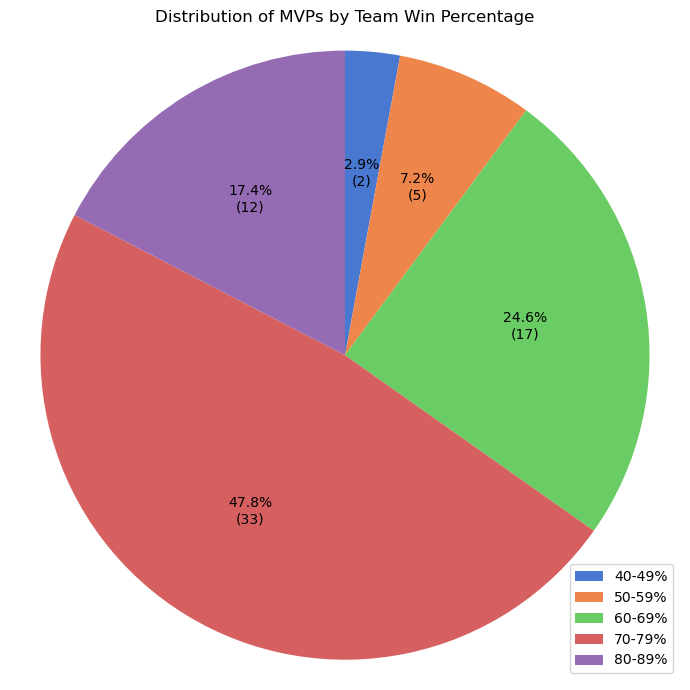

In [293]:
plt.figure(figsize=(7, 7))
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count})'
    return my_autopct
plt.pie(
    df_win_count.values, 
    labels=df_win_count.index, 
    autopct=make_autopct(df_win_count.values), 
    startangle=90,
    counterclock=False,
    labeldistance=None
)
plt.title('Distribution of MVPs by Team Win Percentage')
plt.legend(loc=4).set_visible(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

The minimum seems to be at least 60-69 but the majority wins 70-79 percent of their team games.
This seems to be a very important part of mvp discussion

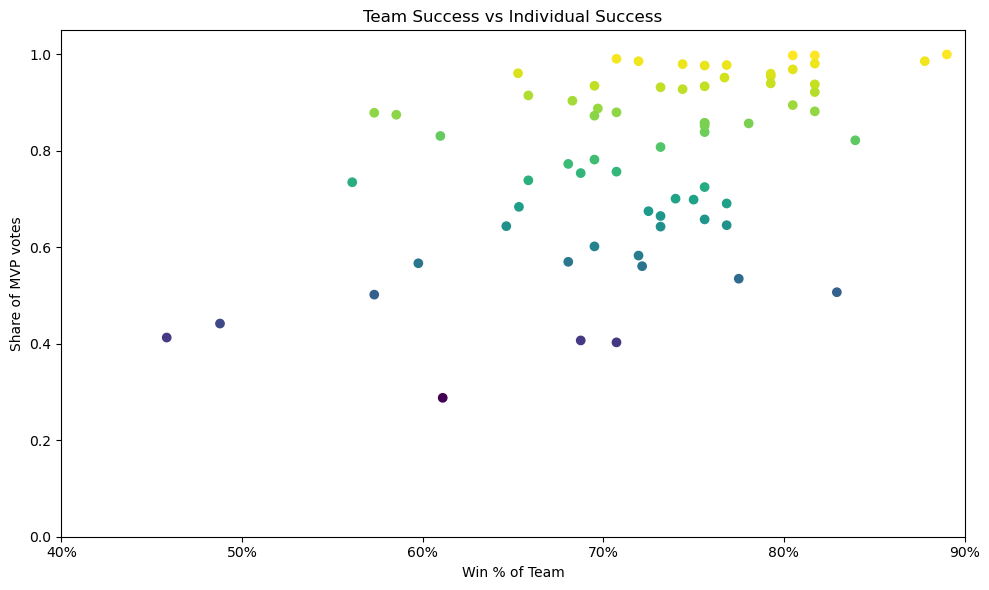

In [286]:
win_vs_share = df_merged_mvp[['Win_%', 'share']]
plt.figure(figsize=(10, 6))
plt.scatter(
    win_vs_share['Win_%'],
    win_vs_share['share'], 
    c=win_vs_share['share'],
    cmap='viridis'
)
plt.title('Team Success vs Individual Success')
plt.ylabel('Share of MVP votes')
plt.xlabel('Win % of Team')
plt.xlim(40, 90)
plt.ylim(0, 1.05)
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

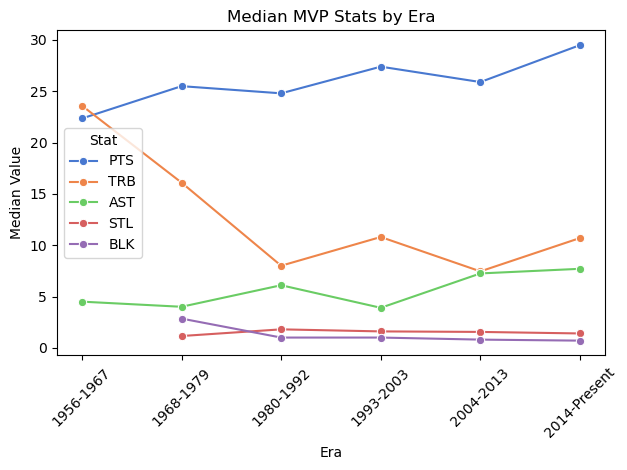

In [232]:

mvp_top_stats = df_merged_mvp.groupby('Era',observed=False)[['PTS', 'TRB', 'AST', 'STL', 'BLK']].median()
mvp_top_stats_long = mvp_top_stats.reset_index().melt(id_vars='Era', var_name='Stat', value_name='Median') # Needed because since we are plotting multiple stats, it is needed
sns.lineplot(data=mvp_top_stats_long, x='Era', y='Median', hue='Stat', marker='o')
plt.title('Median MVP Stats by Era')
plt.xlabel('Era')
plt.ylabel('Median Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It can be seen that there are a gradual rise with some key offensive stats such as points and AST, meanwhile TRB is massively down. This fits with the curent 3 point era with more points and faster plays

MVP Experience Analysis
Uses Experience instead of age because there is a chance of mvp potentially joining the nba late, believe that this will be a better way of measurement

In [300]:
count_age = df_player_seasons.groupby(['season', 'age'])['age'].count()
count_age

season  age 
1947    21.0     4
        22.0     7
        23.0    35
        24.0    33
        25.0    30
                ..
2025    36.0    11
        37.0     3
        38.0     4
        39.0     3
        40.0     1
Name: age, Length: 1442, dtype: int64

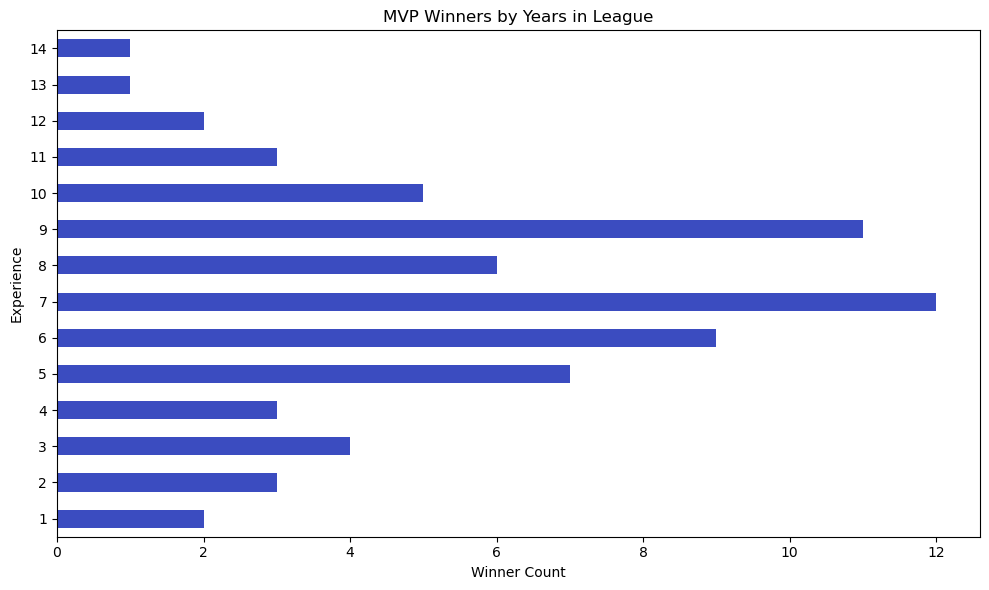

In [303]:
df_mvp_age = df_merged_mvp.copy().groupby('experience')
plt.figure(figsize=(10,6))
df_mvp_age['experience'].count().plot(kind='barh', colormap='coolwarm')
plt.title('MVP Winners by Years in League')
plt.ylabel('Experience')
plt.xlabel('Winner Count')
plt.tight_layout()
plt.show()


Seems like prime begins from 5-10 years in the league, this can be used for prediction model
This graph shows raw MVP counts by years of experience. While normalizing by total league population at each experience level could give a per-player rate, doing so may exaggerate outliers where very few players are eligible. For this reason, raw counts were chosen to preserve interpretability.

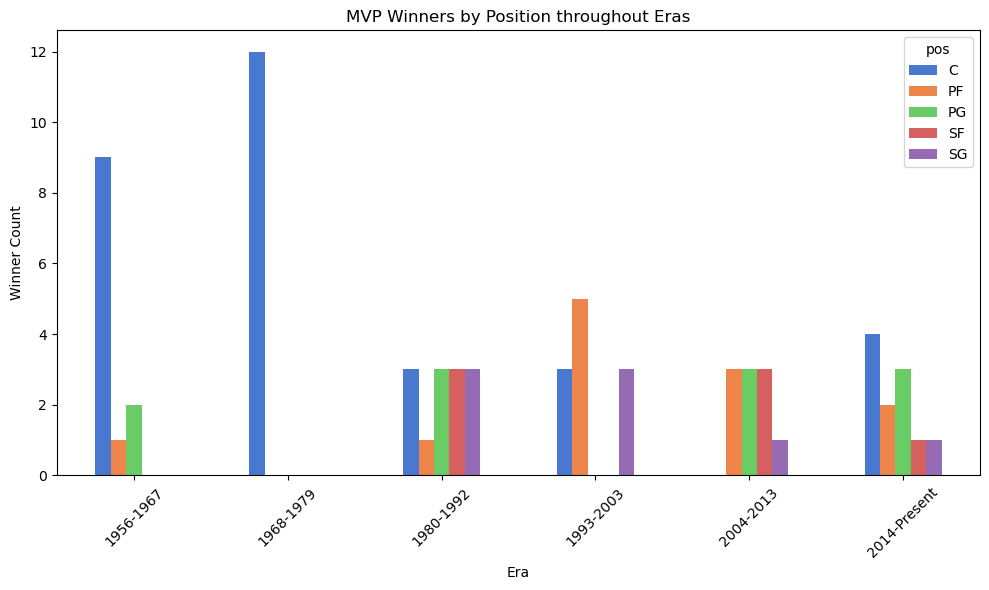

In [234]:
# Position Winner Changes throughout the years, Im thinking a column chart with line chart
sns.set_palette('muted')
df_winner_positions = pd.pivot_table(df_merged_mvp, index='Era', columns='pos', values='player' ,aggfunc='count', observed=False) # Index x, Columns filter, values is why
fig, ax = plt.subplots(figsize=(10, 6))
df_winner_positions.plot(kind='bar', ax=ax)
plt.title('MVP Winners by Position throughout Eras')
ax.tick_params("x", rotation=45)
plt.xlabel('Era')
plt.ylabel("Winner Count")
plt.tight_layout()
plt.show()

Can be seen that it was heavily dominated by big men early, especially in 2nd era with all being center

In [235]:
df_stats_corr = df_merged_mvp.copy()
df_stats_corr = df_stats_corr.drop(columns=['season', 'award', 'player', 'tm', 'first', 'pts_won', 'pts_max', 'share', 'winner', 'gs', 'pos', 'Era', 'g', 'age', 'experience', 'team', 'w', 'l', 'Win_Bin'])
cor_matrix = df_stats_corr.corr()
cor_matrix

,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Win_%
MP,1.000000,0.253195,0.303010,-0.060385,-0.448440,-0.461011,-0.324567,0.438309,0.554690,-0.285938,-0.306628,-0.001530,0.331453,-0.574728,0.391457,0.113839,0.630119,-0.265586,0.050279,0.422963,-0.234668,0.084967,0.095668,-0.089024
FG,0.253195,1.000000,0.868109,0.411007,-0.187587,-0.159686,-0.199809,0.899375,0.758129,0.357682,0.312218,0.422667,0.495506,-0.025125,0.208651,0.259120,0.017540,-0.223031,0.282361,0.345535,-0.265639,0.237438,0.913038,-0.087079
FGA,0.303010,0.868109,1.000000,-0.085284,0.014336,0.066259,-0.066007,0.751493,0.818425,-0.100048,-0.124650,0.539209,0.532840,0.077361,0.028254,0.014373,-0.035529,-0.253564,0.412858,0.118046,-0.155174,0.160068,0.867140,-0.188024
FG%,-0.060385,0.411007,-0.085284,1.000000,-0.361510,-0.396014,-0.246007,0.414061,0.009847,0.926774,0.881690,-0.103997,0.062498,-0.184704,0.344825,0.491296,0.084898,0.059879,-0.244932,0.438588,-0.155011,0.122968,0.256761,0.152409
3P,-0.448440,-0.187587,0.014336,-0.361510,1.000000,0.983510,0.618939,-0.689961,-0.679502,0.034071,0.326620,-0.026616,-0.168571,0.429889,-0.557652,-0.351769,-0.468258,0.403828,0.160575,-0.543417,0.325933,-0.439308,0.130588,0.200051
3PA,-0.461011,-0.159686,0.066259,-0.396014,0.983510,1.000000,0.608098,-0.660041,-0.651288,0.040172,0.273145,0.064463,-0.072313,0.387367,-0.576685,-0.316092,-0.448920,0.425068,0.165095,-0.559893,0.392172,-0.420194,0.187728,0.136703
3P%,-0.324567,-0.199809,-0.066007,-0.246007,0.618939,0.608098,1.000000,-0.488126,-0.477597,0.025084,0.206314,-0.226202,-0.403155,0.521938,-0.620029,-0.286610,-0.444427,0.468367,0.240592,-0.430383,0.023971,-0.381222,-0.077456,0.151550
2P,0.438309,0.899375,0.751493,0.414061,-0.689961,-0.660041,-0.488126,1.000000,0.904625,0.231702,0.120526,0.318195,0.487336,-0.236812,0.449737,0.421922,0.246659,-0.383395,0.102228,0.560313,-0.353847,0.394321,0.713852,-0.188132
2PA,0.554690,0.758129,0.818425,0.009847,-0.679502,-0.651288,-0.477597,0.904625,1.000000,-0.195616,-0.290459,0.346684,0.486325,-0.221577,0.417295,0.299049,0.288176,-0.476872,0.161252,0.495330,-0.360757,0.378519,0.601571,-0.285443
2P%,-0.285938,0.357682,-0.100048,0.926774,0.034071,0.040172,0.025084,0.231702,-0.195616,1.000000,0.959746,-0.022035,0.049807,-0.013759,0.056747,0.342235,-0.100276,0.237841,-0.167627,0.118814,0.038353,-0.011155,0.306548,0.188630


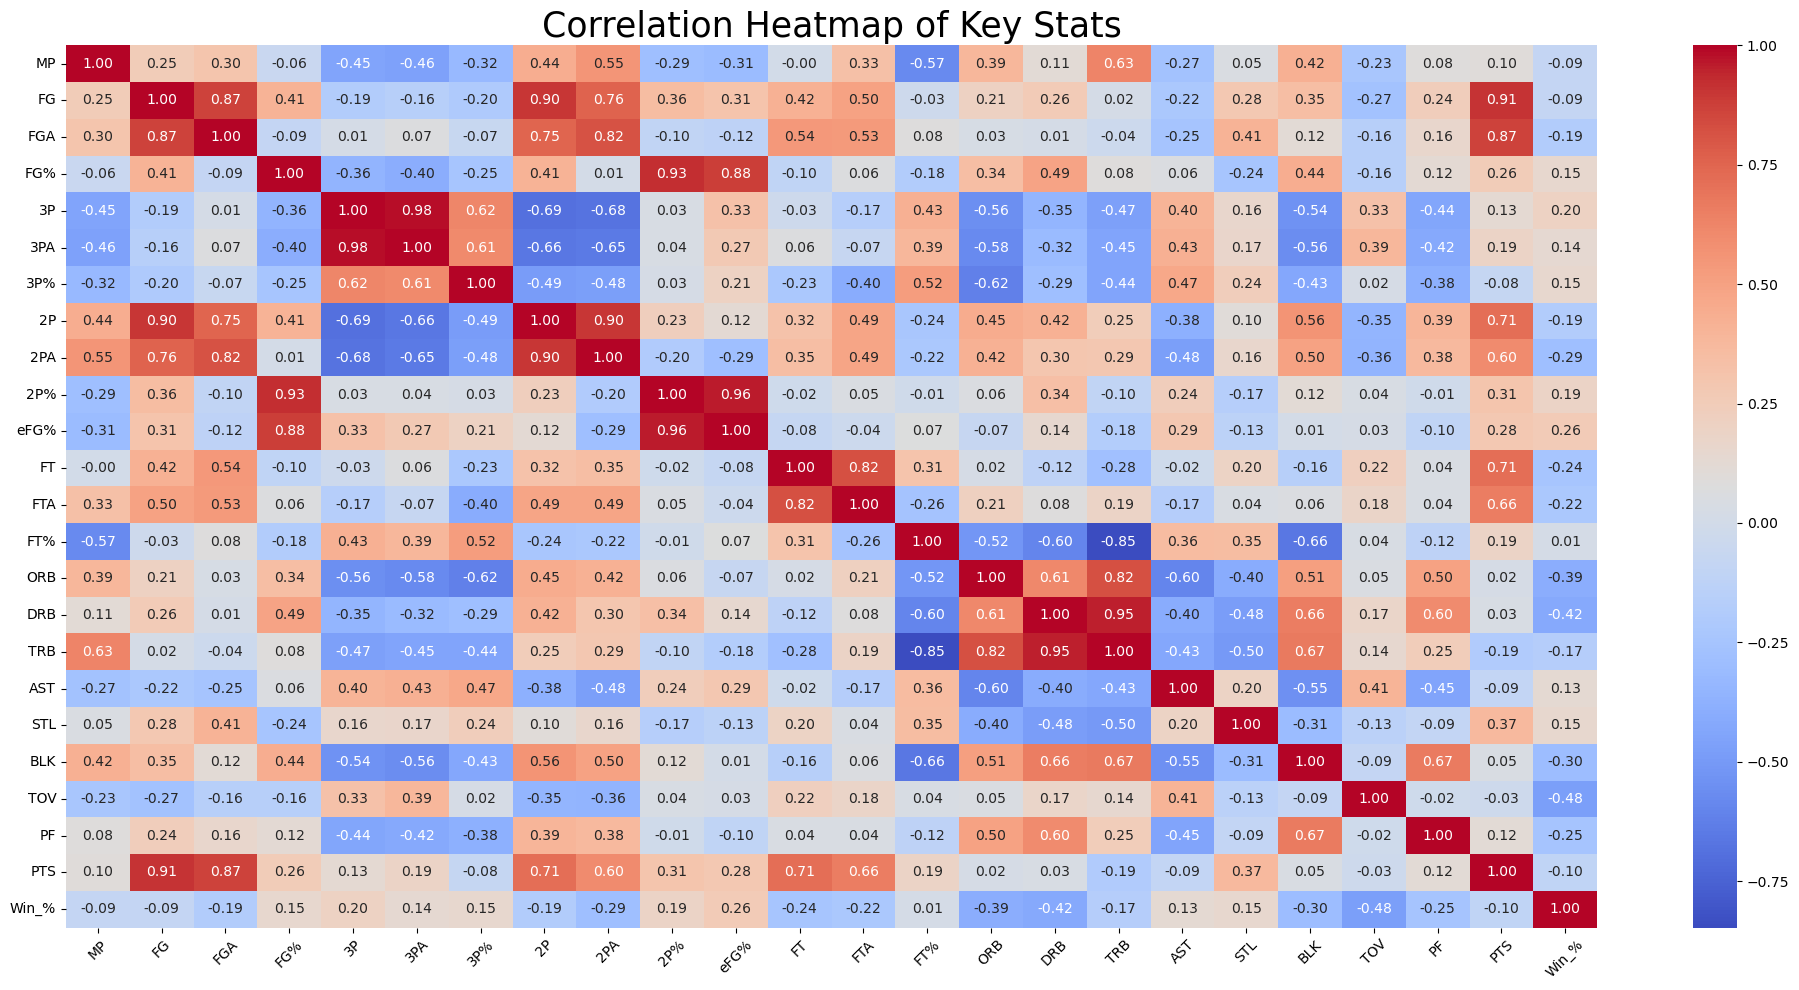

In [236]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.title('Correlation Heatmap of Key Stats', fontsize = 25)
plt.tight_layout()
plt.show()